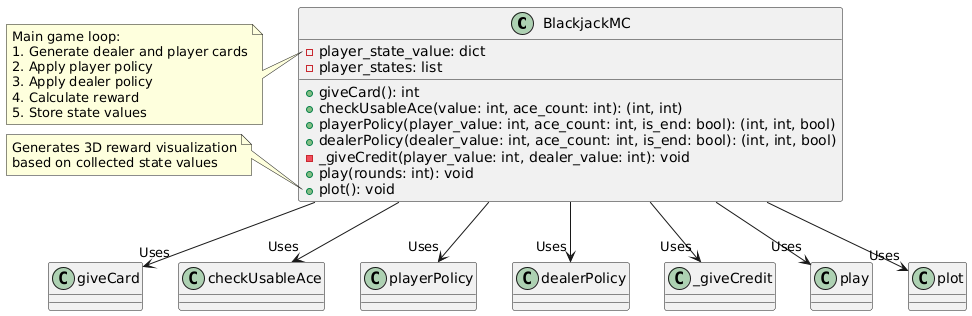

### **AIM:**  
To implement a **Monte Carlo-based Blackjack simulation**, analyze player-dealer interactions, and evaluate optimal strategies using **state-value estimation**.  

### **Algorithm:**  
1. **Initialize** state-value dictionary.  
2. **Deal initial cards** to player and dealer.  
3. **Player policy**: Hit until **value ≥ 20**.  
4. **Dealer policy**: Hit until **value ≥ 17**.  
5. **Reward calculation**: +1 (win), -1 (loss), 0 (draw).  
6. **Update state values** using Monte Carlo averaging.  

### **Result:**  
The simulation **estimates optimal policies** by iteratively improving **state values**, visualized in a **3D reward distribution** based on **player sum, dealer card, and usable ace**.  

### **Output Description:**  
The **3D plot** displays how player rewards vary with **dealer's visible card** and **player’s total sum**. **Higher peaks** indicate **better win probabilities**, while **low valleys** represent **frequent losses**.

Round 1000
Round 2000
Round 3000
Round 4000
Round 5000
Round 6000
Round 7000
Round 8000
Round 9000
Round 10000


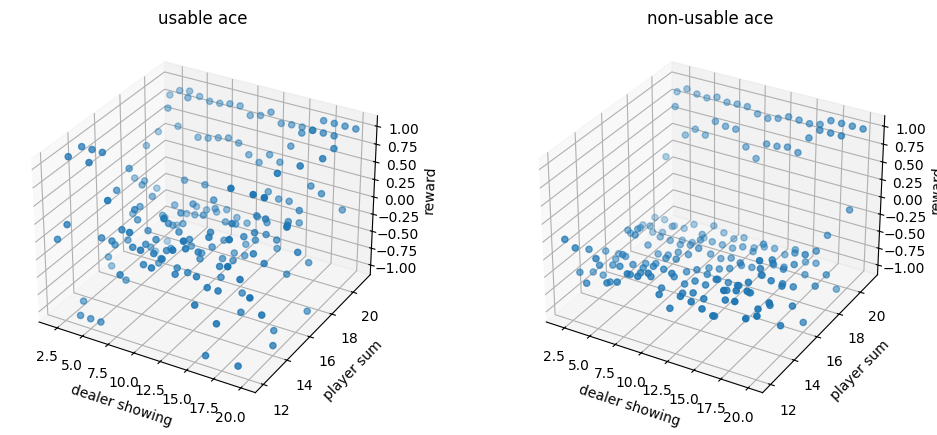

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class BlackjackMC:
    def __init__(self):
        self.player_state_value = {}
        self.player_states = []

    def giveCard(self):
        return np.random.randint(1, 11)

    def checkUsableAce(self, value, ace_count):
        while value > 21 and ace_count > 0:
            value -= 10
            ace_count -= 1
        return value, ace_count

    def playerPolicy(self, player_value, ace_count, is_end):
        if player_value < 20:
            card = self.giveCard()
            if card == 1:
                ace_count += 1
                player_value += 11
            else:
                player_value += card

            player_value, ace_count = self.checkUsableAce(player_value, ace_count)

            if player_value > 21:
                is_end = True
        else:
            is_end = True
        return player_value, ace_count, is_end

    def dealerPolicy(self, dealer_value, ace_count, is_end):
        if dealer_value < 17:
            card = self.giveCard()
            if card == 1:
                ace_count += 1
                dealer_value += 11
            else:
                dealer_value += card

            dealer_value, ace_count = self.checkUsableAce(dealer_value, ace_count)

            if dealer_value > 21:
                is_end = True
        else:
            is_end = True
        return dealer_value, ace_count, is_end

    def _giveCredit(self, player_value, dealer_value):
        reward = 0
        if player_value > 21:
            reward = -1
        elif dealer_value > 21 or player_value > dealer_value:
            reward = 1
        elif player_value < dealer_value:
            reward = -1

        for state in self.player_states:
            if state not in self.player_state_value:
                self.player_state_value[state] = [0, 0]  # (total_reward, visit_count)
            self.player_state_value[state][0] += reward
            self.player_state_value[state][1] += 1

    def play(self, rounds=10000):
        for round_num in range(1, rounds + 1):
            if round_num % 1000 == 0:
                print(f"Round {round_num}")

            dealer_value = self.giveCard() + self.giveCard()
            dealer_ace_count = 1 if dealer_value == 11 else 0

            player_value = self.giveCard() + self.giveCard()
            player_ace_count = 1 if player_value == 11 else 0

            player_value, player_ace_count = self.checkUsableAce(player_value, player_ace_count)
            dealer_value, dealer_ace_count = self.checkUsableAce(dealer_value, dealer_ace_count)

            is_end = False
            self.player_states = []

            while not is_end:
                player_value, player_ace_count, is_end = self.playerPolicy(player_value, player_ace_count, is_end)
                if 12 <= player_value <= 21:
                    self.player_states.append((player_value, dealer_value, player_ace_count > 0))

            is_end = False
            while not is_end:
                dealer_value, dealer_ace_count, is_end = self.dealerPolicy(dealer_value, dealer_ace_count, is_end)

            self._giveCredit(player_value, dealer_value)

    def plot(self):
        fig = plt.figure(figsize=(12, 5))

        for i, usable_ace in enumerate([True, False]):
            ax = fig.add_subplot(1, 2, i + 1, projection='3d')
            x, y, z = [], [], []

            for (player_sum, dealer_showing, ace), reward in self.player_state_value.items():
                if ace == usable_ace:
                    x.append(dealer_showing)
                    y.append(player_sum)
                    z.append(reward[0] / max(1, reward[1]))  # Averaging reward to avoid division by zero

            ax.scatter(x, y, z)
            ax.set_xlabel('dealer showing')
            ax.set_ylabel('player sum')
            ax.set_zlabel('reward')
            ax.set_title(f"{'usable ace' if usable_ace else 'non-usable ace'}")

        plt.show()

if __name__ == "__main__":
    bj = BlackjackMC()
    bj.play()
    bj.plot()

In [30]:
bj.player_state_value.get((18, 5, False))

[-31, 53]

In [31]:
bj.player_state_value.get((18, 10, False))

[-92, 144]